In [1]:
# Necessary Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!python scripts/process_logs.py --metrics-path=./experiments/12_layers_12_heads/base/metrics.csv

In [5]:
# Source Metrics Files
metrics_dir = Path('./experiments/12_layers_12_heads/base/')
step_metrics_path = metrics_dir / 'step_metrics.csv'
epoch_metrics_path = metrics_dir / 'epoch_metrics.csv'

step_metrics = pd.read_csv(step_metrics_path)
epoch_metrics = pd.read_csv(epoch_metrics_path)

step_metrics = step_metrics[step_metrics['train_loss'] != 0.0] # aggregation error in my process_logs.py script

<Axes: xlabel='step', ylabel='train_loss'>

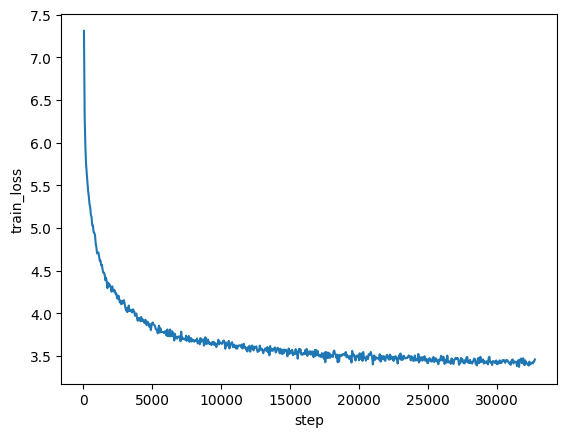

In [6]:
# Training loss curve
before_explosion = step_metrics[step_metrics['train_loss'] < 10]
sns.lineplot(data=before_explosion, x='step', y='train_loss')

<Axes: xlabel='step', ylabel='grad_norm'>

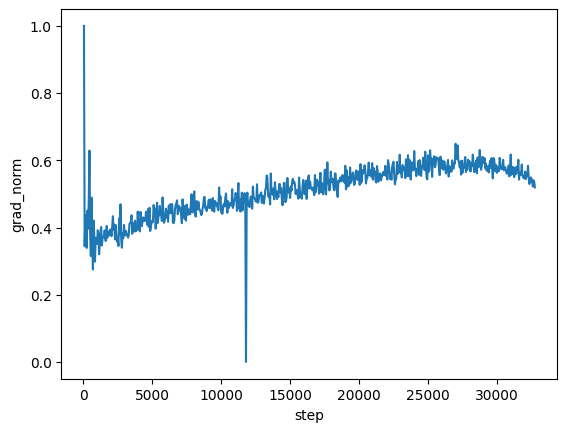

In [7]:
# Gradient norms over time
sns.lineplot(data=before_explosion, x='step', y='grad_norm')

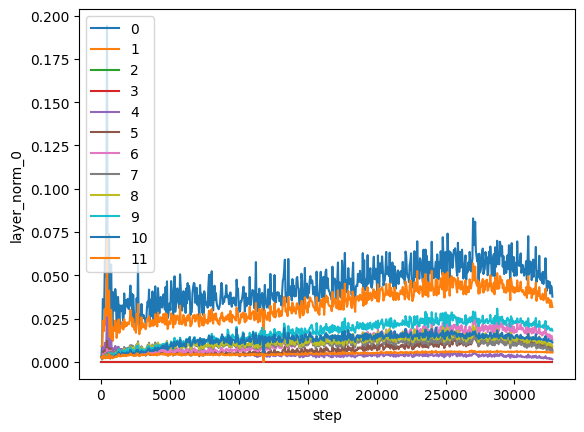

In [8]:
# Layers' norms over time
layer_cols = []
layer_count = 0
for col in step_metrics.columns:
    if col.startswith('layer'):
        # columns are sorted, so layer_count will be in sync
        sns.lineplot(data=before_explosion, x='step', y=col, label=layer_count)
        layer_count += 1

<Axes: xlabel='epoch', ylabel='train_loss'>

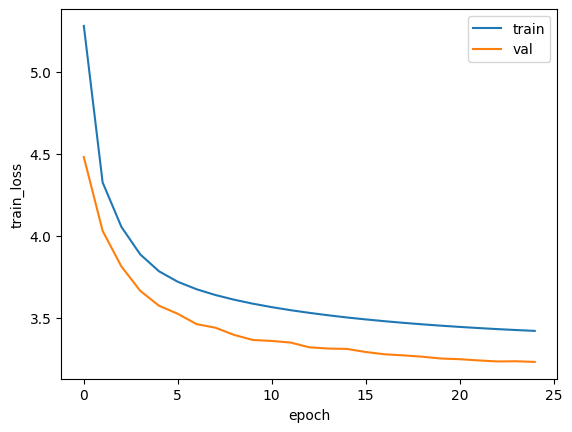

In [9]:
# Training vs. validation loss over epochs
sns.lineplot(data=epoch_metrics, x='epoch', y='train_loss', label='train')
sns.lineplot(data=epoch_metrics, x='epoch', y='val_loss', label='val')

In [17]:
!python scripts/process_logs.py --metrics-path=./experiments/1_layer_8_heads/base/metrics.csv
!python scripts/process_logs.py --metrics-path=./experiments/1_layer_8_heads/euc/metrics.csv
!python scripts/process_logs.py --metrics-path=./experiments/1_layer_8_heads/man/metrics.csv
!python scripts/process_logs.py --metrics-path=./experiments/1_layer_8_heads/oracle/finetune/metrics.csv

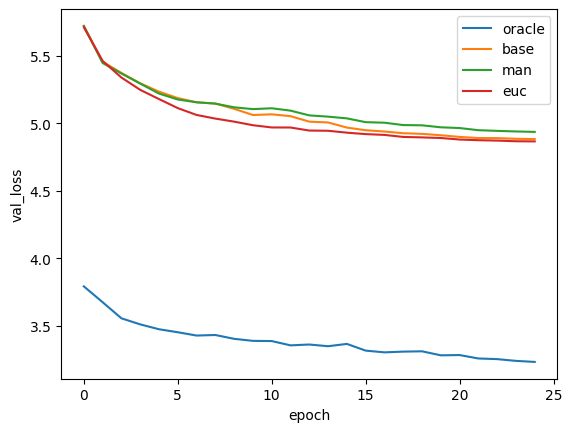

In [18]:
# Compare with all models of same embedding dimension
embed_dir = Path('./experiments/1_layer_8_heads')
for file_path in embed_dir.glob("./*"):
    if (model_dir := file_path).is_dir():
        try:
            epochs_path = model_dir / 'epoch_metrics.csv'
            epochs = pd.read_csv(epochs_path)
            sns.lineplot(data=epochs, x='epoch', y='val_loss', label=model_dir.stem)
        except FileNotFoundError:
            print(f"{epochs_path} does not exist! Skipping...")